# Universidad Abierta y a Distancia.
### Algoritmo de Aprendizaje No Supervisado

In [316]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [318]:
# Cargar los datos
df = pd.read_csv('C:/Users/brayg/OneDrive - Universidad Nacional Abierta y a Distancia/UNAD/2025/PERIODO 16-01/ANÁLISIS DE DATOS/Tarea 4 - Algoritmos de Aprendizaje No Supervisado/Mall_Customers.csv')

# Mostrar información básica
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [320]:
# Visualización inicial
print("\nInformación del dataset:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [322]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


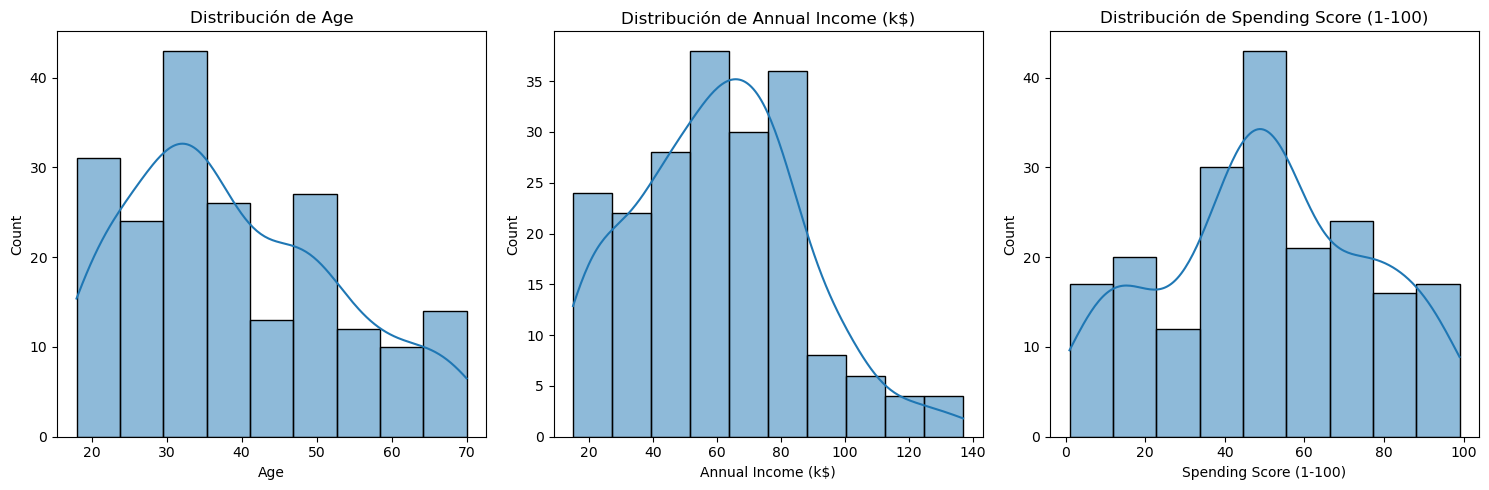

In [324]:
# Histogramas de variables numéricas
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

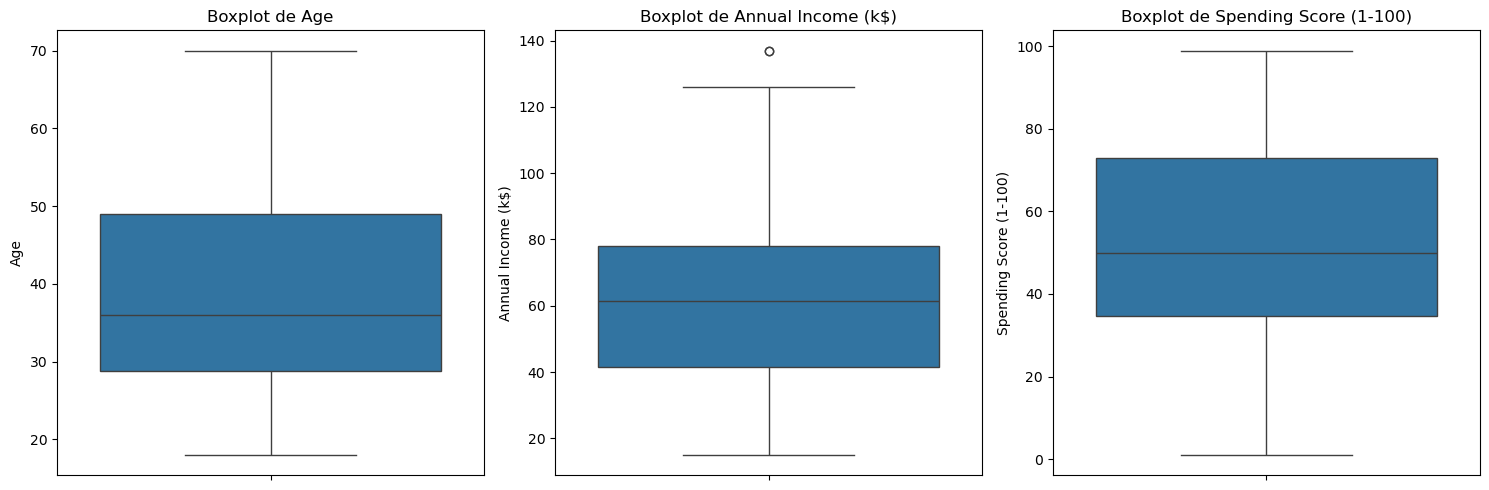

In [325]:
# Diagramas de caja para detectar outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

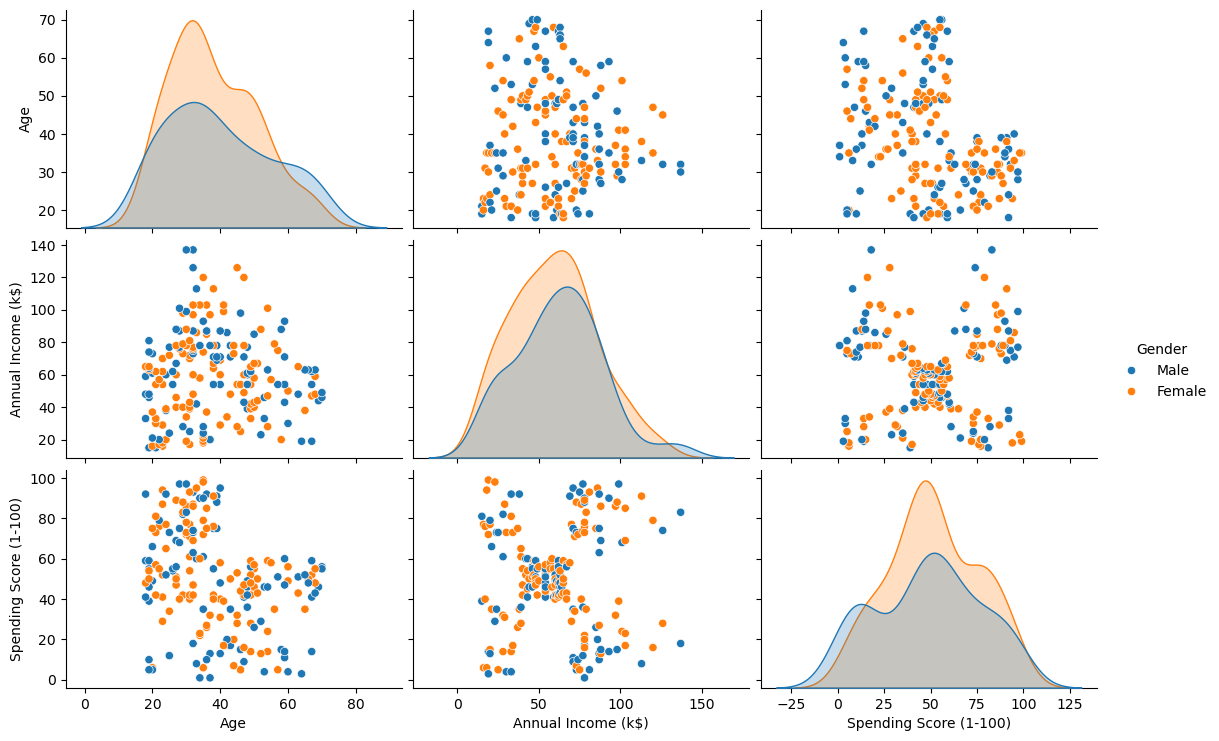

In [326]:
# Relación entre variables
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

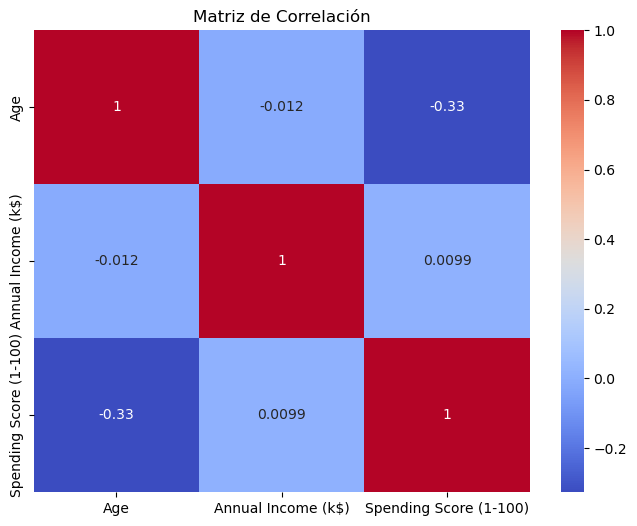

In [327]:
# Correlación entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(['CustomerID', 'Gender'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Preprocesamiento de Datos

In [329]:
# Codificar variable categórica Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [331]:
# Escalar las variables numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score'])
df_scaled['Gender'] = df['Gender']  # Mantener la variable Gender codificada

In [332]:
# Seleccionar características para clustering (excluyendo Gender inicialmente)
X = df_scaled[['Annual Income', 'Spending Score']]

# K-means Clustering

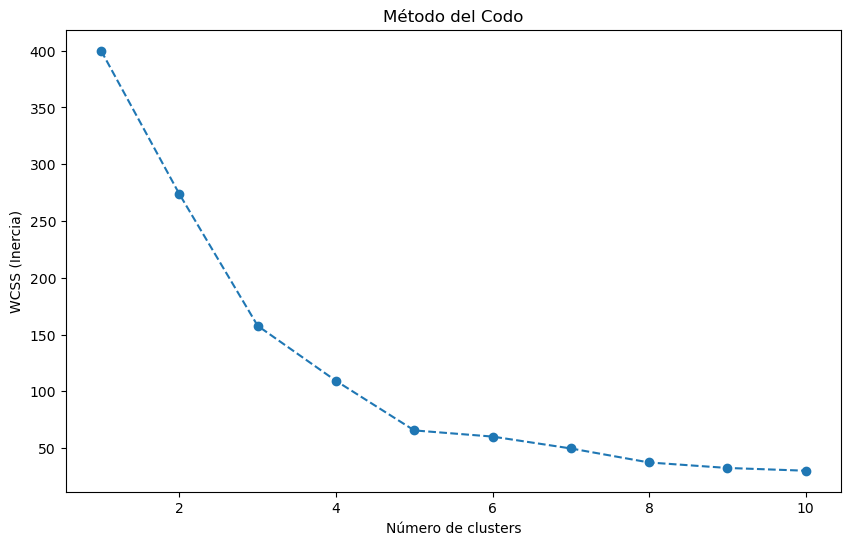

In [335]:
# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Inercia)')
plt.show()

In [336]:
# Entrenar K-means con k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
# Añadir clusters al dataframe
df['Cluster_Kmeans'] = y_kmeans

In [337]:
# Métricas para K-means (Evaluación)
print("\nMétricas para K-means:")
print(f"Silhouette Score: {silhouette_score(X, y_kmeans)}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X, y_kmeans)}")


Métricas para K-means:
Silhouette Score: 0.5546571631111091
Calinski-Harabasz Index: 248.64932001536357


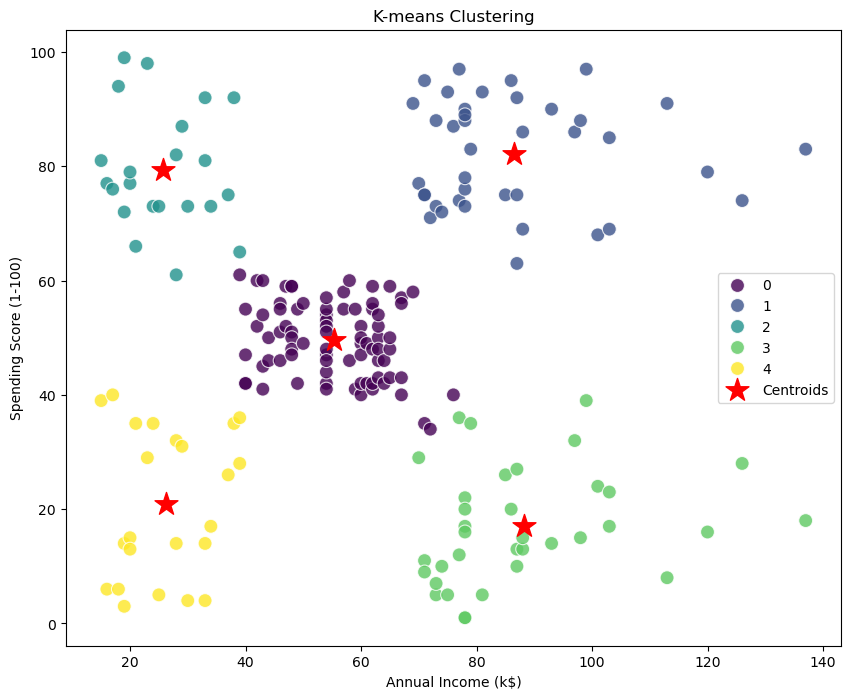

In [338]:
# Visualización K-means
plt.figure(figsize=(10, 8))
#plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_Kmeans', data=df, palette='viridis',
                s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0]*scaler.scale_[1] + scaler.mean_[1], 
           kmeans.cluster_centers_[:, 1]*scaler.scale_[2] + scaler.mean_[2], 
           s=300, c='red', marker='*', label='Centroids')
plt.title('K-means Clustering')
plt.legend()

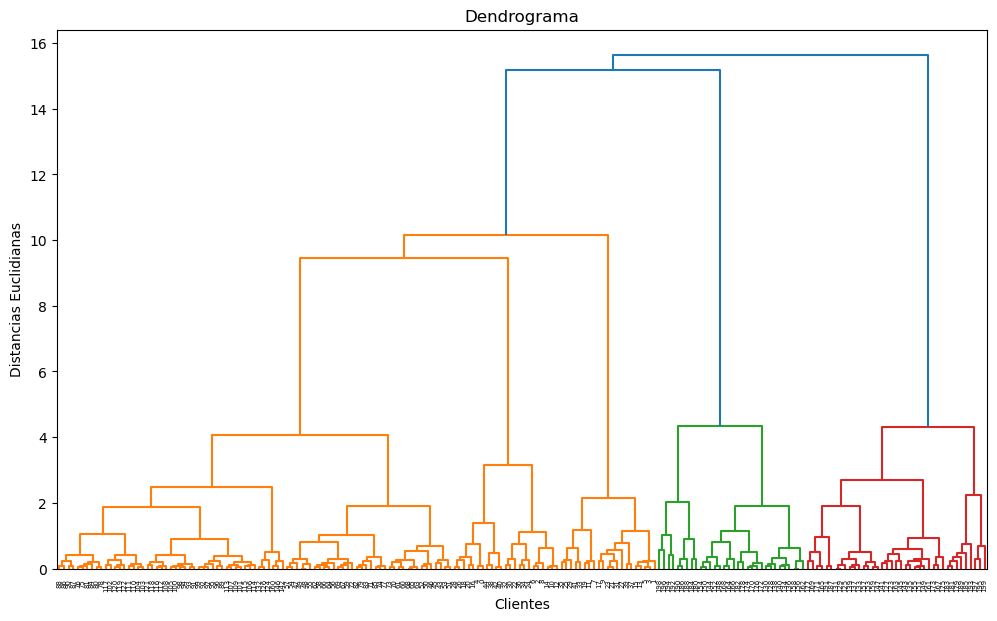

In [339]:
# Dendrograma para determinar número de clusters
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), 
                            orientation='top',
                            distance_sort='descending', 
                            show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [340]:
# Entrenar Hierarchical Clustering con 5 clusters
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc.fit_predict(X)
df['Cluster_Hierarchical'] = hc.labels_

In [341]:
# Métricas para Hierarchical Clustering (Evaluación)
print("\nMétricas para Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette_score(X, hc.labels_)}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X, hc.labels_)}")


Métricas para Hierarchical Clustering:
Silhouette Score: 0.5538089226688662
Calinski-Harabasz Index: 244.41032586596822


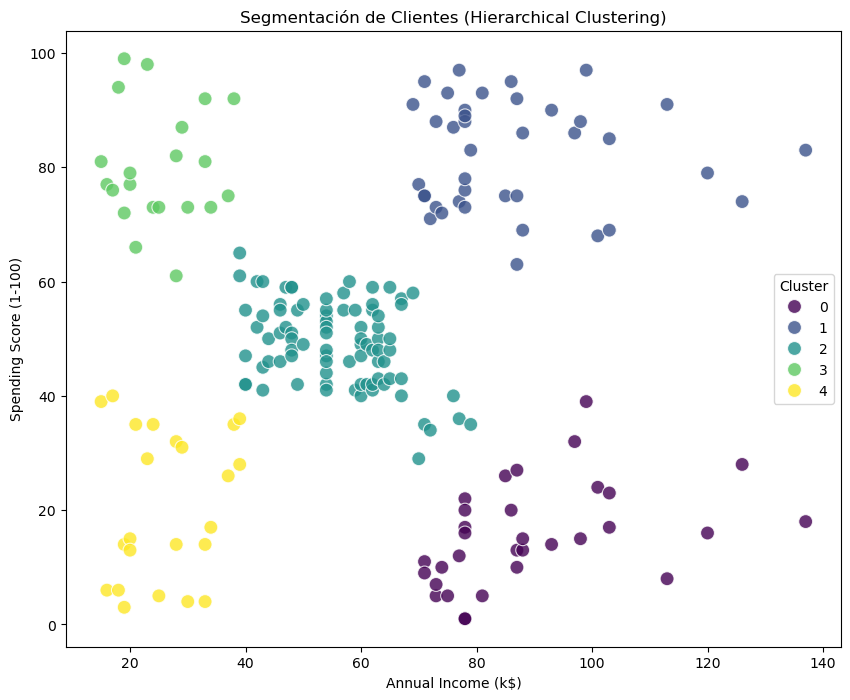

In [342]:
# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue=y_hc, data=df, palette='viridis', 
                s=100, alpha=0.8)
plt.title('Segmentación de Clientes (Hierarchical Clustering)')
plt.legend(title='Cluster')
plt.show()

In [357]:
# Analizar características de cada cluster
cluster_profile = df.groupby('Cluster_Kmeans').mean()
print("\nPerfil de clusters:")
print(cluster_profile)


Perfil de clusters:
                CustomerID    Gender        Age  Annual Income (k$)  \
Cluster_Kmeans                                                        
0                86.320988  0.592593  42.716049           55.296296   
1               162.000000  0.538462  32.692308           86.538462   
2                23.090909  0.590909  25.272727           25.727273   
3               164.371429  0.457143  41.114286           88.200000   
4                23.000000  0.608696  45.217391           26.304348   

                Spending Score (1-100)  Cluster_Hierarchical  
Cluster_Kmeans                                                
0                            49.518519              2.000000  
1                            82.128205              1.000000  
2                            79.363636              2.954545  
3                            17.114286              0.171429  
4                            20.913043              4.000000  


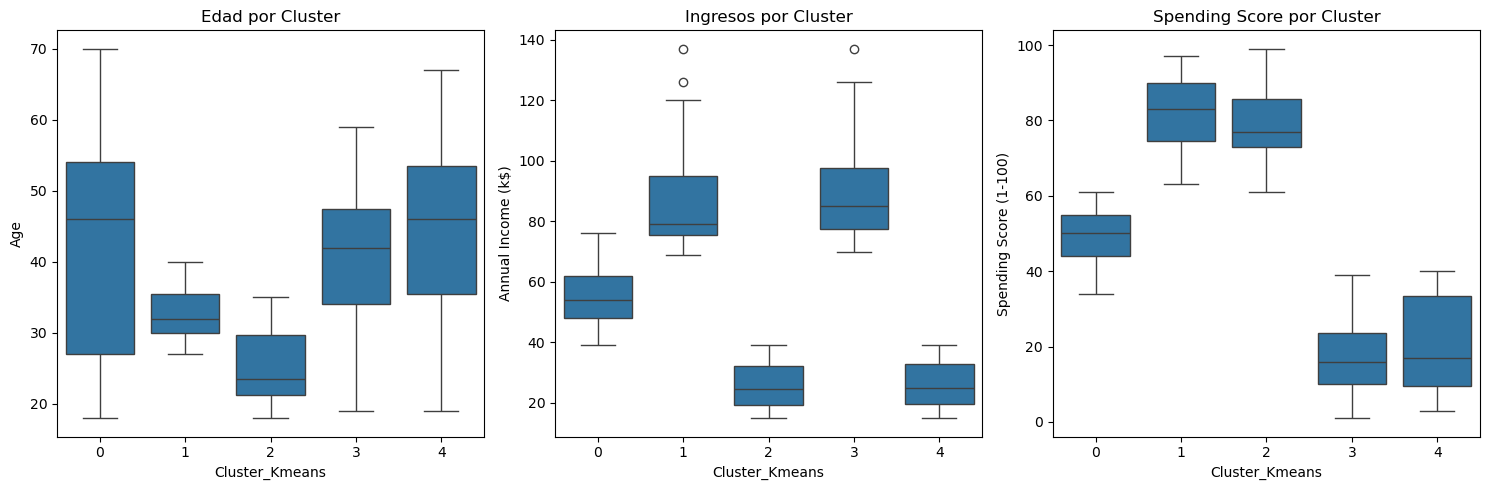

In [373]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Cluster_Kmeans', y=feature, data=df)
    plt.title(f'{titles[i]} por Cluster')
plt.tight_layout()
plt.show()

Para entender la estructura y distribución de los datos se utilizaron histogramas y boxplots para la visualización de la distribución, detección de outliers en ingresos (Annual Income) y puntajes de gatos (Spending Score).

Se elimino la columna CustomerID, la cual no era una variable relevante. 

Se codifico los valores de la variable genero (Gender) donde male es igual a 0 y Famale a 1.

Como características mas relevantes se seleccionaron Annual Income (k$) y Spending Score (1-100) donde tenían menor correlación entre si (0,01) que otras combinaciones.

Se utilizo el método del codo para una determinación de k óptimo, con el hiperparametro de asignando a k del valor de 5 para la asignación de clusters y linkage ‘ward’.

Las métricas aplicadas fueron el Coeficiente de Silhouette donde su valor en Kmeans es de 0.55 y en el Hierarchical 0.53, índice de Calinski-Harabasz en Kmeans es de 247.61 y en el Hierarchical de 239.45. Lo cual son valores que indican una estructura de cluster razonable y consistes.

Como interpretacion de los cluster podemos definir que son naturales en los datos corresponden a patrones de comportamiento reales, el cluster 2 representa un grupo de alto valor con potencial de mayor rentabilidad, el cluster 1 es el mas numeroso lo cual es una oportunidad para marketing masivo.
